# Module 2 Summative Lab

## Introduction

This is an investigation into the performance of football teams in the German D1 and D2 leagues during 2011. I will be looking at summary performance statistics of teams with a visualisation. I will also be investigating the effect of whether on team performance. I will be using a variety of data sources for this including:

* Database of European football performance since the early 00's as the primary data set
* This will be cross referenced with historic weather data by location using the [DarkSky API](https://darksky.net/dev)
* This information will be uploaded to a Mongo DB for ease of future investigate

During these steps I will demostrate awareness and competence of the PEP8 standard for [Python coding](https://www.python.org/dev/peps/pep-0008/) and Object Oriented programming principles.  

### Extract, Transform, Load Stage

In [734]:
#import libraries and styles for visuals

import matplotlib.style as style 
style.available
style.use('seaborn-poster') 
style.use('fivethirtyeight')
from matplotlib import pyplot as plt

In [684]:
#import Pandas package and establish connection to the database

import pandas as pd
import sqlite3 
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

In [685]:
#query database for all of the games in Germany in the 2011 season and load into the cursor object 

all_german_2011_season = cur.execute("""SELECT Matches.Match_ID, HomeTeam, AwayTeam, FTHG, FTAG, FTR, Date
                                     From Matches
                                     JOIN Teams_in_Matches
                                     ON Matches.Match_ID = Teams_in_Matches.Match_ID
                                     WHERE Matches.Season = 2011 AND (Matches.Div = "D1" OR Matches.Div = "D2")
                                     """)

In [686]:
#retrieve results from cursor object and place the in a Pandas dataframe with the correct column names 

all_german_2011_season_df = pd.DataFrame(cur.fetchall())
all_german_2011_season_df.columns = [i[0] for i in cur.description]

In [687]:
"""
Verify output is as required. Here we have each match played in the season, 
the teams (home/away hence each match has two entries in the dataframe), 
the home and the away scores. We also have the result and the date the match 
was played on.
"""

all_german_2011_season_df.head()

,Match_ID,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Date
0,1092,Nurnberg,Bayern Munich,0,1,A,2012-03-31
1,1092,Nurnberg,Bayern Munich,0,1,A,2012-03-31
2,1093,Stuttgart,Bayern Munich,1,2,A,2011-12-11
3,1093,Stuttgart,Bayern Munich,1,2,A,2011-12-11
4,1094,Wolfsburg,Bayern Munich,0,1,A,2011-08-13


I am using this table as the basis for all of the other queries that will be made. The first step is to establish the amount of goals scored by each team. To do this we need to build some queries using the basic shape established above in order to total the amount of home, away and draw goals each team scored in the season. All of this data will then need to be put into a Pandas dataframe for analysis. 

## Goals Scored Analysis

I will use the data made available in the above query to do a summative assessment of the performnce of German teams in the 2011 season.

In [688]:
#this is the query to the amount of goals scored by teams in the league when they were playing away

away_team_goals = cur.execute("""SELECT AwayTeam AS Team, SUM(FTAG) AS TotalAwayGoals
                             From Matches
                             JOIN Teams_in_Matches
                             ON Matches.Match_ID = Teams_in_Matches.Match_ID
                             WHERE Matches.Season = 2011 AND (Matches.Div = "D1" OR Matches.Div = "D2") AND FTR = "A"
                             GROUP BY Team
                             ORDER BY Team""")

In [689]:
#this data is converted into a dataframe for analysis in Pandas

away_team_goals_df = pd.DataFrame(cur.fetchall())
away_team_goals_df.columns = [i[0] for i in cur.description]

In [690]:
#as above, but we are retrieving the number of goals each team scored in the league when playing at home

home_team_goals = cur.execute("""SELECT HomeTeam AS Team, SUM(FTHG) AS TotalHomeGoals
                             From Matches
                             JOIN Teams_in_Matches
                             ON Matches.Match_ID = Teams_in_Matches.Match_ID
                             WHERE Matches.Season = 2011 AND (Matches.Div = "D1" OR Matches.Div = "D2") AND FTR = "H"
                             GROUP BY Team
                             ORDER BY Team""")

In [691]:
#as above, this data is convered into a Pandas dataframe for analysis

home_team_goals_df = pd.DataFrame(cur.fetchall())
home_team_goals_df.columns = [i[0] for i in cur.description]

In [692]:
#as above, but we are retrieving the number of goals each team scored in the league when playing away and getting a draw

away_team_draw_goals = cur.execute("""SELECT AwayTeam AS Team, SUM(FTAG) AS TotalAwayTeamDrawGoals
                             From Matches
                             JOIN Teams_in_Matches
                             ON Matches.Match_ID = Teams_in_Matches.Match_ID
                             WHERE Matches.Season = 2011 AND (Matches.Div = "D1" OR Matches.Div = "D2") AND FTR = "D"
                             GROUP BY Team
                             ORDER BY Team""")

In [693]:
#as above, this data is convered into a Pandas dataframe for analysis

away_team_draw_goals_df = pd.DataFrame(cur.fetchall())
away_team_draw_goals_df.columns = [i[0] for i in cur.description]

In [694]:
#as above, but we are retrieving the number of goals each team scored in the league when playing at home and getting a draw

home_team_draw_goals = cur.execute("""SELECT HomeTeam AS Team, SUM(FTHG) AS TotalHomeTeamDrawGoals
                             From Matches
                             JOIN Teams_in_Matches
                             ON Matches.Match_ID = Teams_in_Matches.Match_ID
                             WHERE Matches.Season = 2011 AND (Matches.Div = "D1" OR Matches.Div = "D2") AND FTR = "D"
                             GROUP BY Team
                             ORDER BY Team""")

In [695]:
#as above, this data is convered into a Pandas dataframe for analysis

home_team_draw_goals_df = pd.DataFrame(cur.fetchall())
home_team_draw_goals_df.columns = [i[0] for i in cur.description]

In [696]:
#taking all of this information we build a total_goals dataframe

total_goals_df = away_team_goals_df.merge(home_team_goals_df, on="Team").merge(away_team_draw_goals_df, on="Team").merge(home_team_draw_goals_df, on="Team")

In [697]:
#taking all of this data we build a dataframe that we can then use to get the total number of goals per team in the season. 

total_goals_df.insert(5,"TotalGoals", total_goals_df["TotalAwayGoals"]+total_goals_df["TotalHomeGoals"]
                      +total_goals_df["TotalAwayTeamDrawGoals"]+total_goals_df["TotalHomeTeamDrawGoals"])

In [774]:
total_goals_df.sort_values(by="TotalGoals", ascending=False).head(5)

,Team,TotalAwayGoals,TotalHomeGoals,TotalAwayTeamDrawGoals,TotalHomeTeamDrawGoals,TotalGoals
6,Dortmund,66,76,4,10,156
9,Ein Frankfurt,60,70,10,6,146
2,Bayern Munich,46,98,2,0,146
30,Schalke 04,40,88,8,2,138
15,Greuther Furth,34,84,16,2,136


In [681]:
summary_df = pd.DataFrame(total_goals_df["TotalGoals"].describe())
summary_df

,TotalGoals
count,36.000000
mean,81.611111
std,32.970357
min,34.000000
25%,61.000000
50%,71.000000
75%,99.500000
max,156.000000


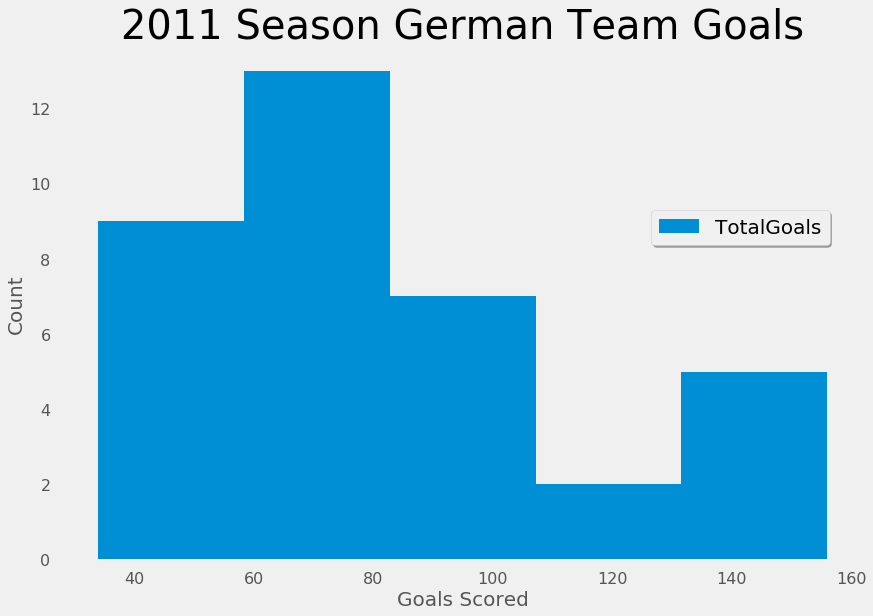

In [664]:
ax = total_goals_df["TotalGoals"].plot.hist(bins=5)
ax.set_xlabel("Goals Scored", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.grid(False)
ax.set_title("2011 Season German Team Goals", fontsize = 40)
ax.legend(loc='upper right', ncol=3, fancybox=True, bbox_to_anchor=(0.97, 0.7), shadow=True, fontsize = 20);

## Goal Scored Analysis

Looking at the data for team performance by number of goals scored we see that the top 3 teams by goal scoring are:

* Dormund
* Ein Frankfurt
* Bayern Munich

All of these teams score well above the group mean of 80 goals for the season. In terms of the spread of the data, we can see from the histogram that there is a right skew with a high standard deviation and 75% of the teams accounting for 99% of the goals in the population. This shows that there is a high vairance between those teams that do really well in this league and the "average" performing teams. Reasons for why this would be so would make an interesting point for further study.

## Team Performance by wins/losses/draws

Building on data aquired in the previous section, I shall now investigte the performance of each team based on the number of wins/losses/draws they achived during the season.

In [700]:
#we build a list of teams in the league so we can do a summary analysis of performance based on previous data

teams = ['Aachen', 
         'Augsburg',
         'Bayern Munich', 
         'Bochum', 
         'Braunschweig', 
         'Cottbus',
         'Dortmund',
         'Dresden',
         'Duisburg',
         'Ein Frankfurt',
         'Erzgebirge Aue',
         'FC Koln',
         'Fortuna Dusseldorf',
         'Frankfurt FSV',
         'Freiburg',
         'Greuther Furth',
         'Hamburg',
         'Hannover',
         'Hansa Rostock',
         'Hertha',
         'Hoffenheim',
         'Ingolstadt',
         'Kaiserslautern',
         'Karlsruhe',
         'Leverkusen',
         'M\'gladbach',
         'Mainz',
         'Munich 1860',
         'Nurnberg',
         'Paderborn',
         'Schalke 04',
         'St Pauli',
         'Stuttgart',
         'Union Berlin',
         'Werder Bremen',
         'Wolfsburg']

In [761]:
#we build an empty dictionary based on the teams with columns for wins, loses and draws

win_lose_count_dataframe_shape = {'Team': teams, 
                                  'Wins': [0]*36, 
                                  'Loses': [0]*36,
                                  'Draws': [0]*36}

In [762]:
#we convert the dictionary into a Pandas dataframe for analysis

win_lose_count_df = pd.DataFrame(data=win_lose_count_dataframe_shape)

In [763]:
#we set the index of the dataframe on the team, to help with easier aggregation

win_lose_count_df.set_index(keys="Team", inplace=True)

In [764]:
#sample of how this dataframe looks, but it is for all 36 teams in the league

win_lose_count_df.head()

,Wins,Loses,Draws
Team,,,
Aachen,0,0,0
Augsburg,0,0,0
Bayern Munich,0,0,0
Bochum,0,0,0
Braunschweig,0,0,0


In [765]:
"""
this logic returns an iterator of the all_german_2011_season_df dataframe and we sum the number of away wins, 
home wins and draw count in the win_lose_count_df dataframe
"""

for i, row in all_german_2011_season_df.iterrows():
    if row['FTR'] == 'A':
        win_lose_count_df.loc[row["AwayTeam"]]["Wins"] +=1
    if row['FTR'] == 'H':
        win_lose_count_df.loc[row["HomeTeam"]]["Wins"] +=1
    if row['FTR'] == 'D':
        win_lose_count_df.loc[row["HomeTeam"]]["Draws"] +=1

In [766]:
"""
We have double counted the number of wins in the all_german_2011_season_df dataframe as each match 
is entered twice (for the home teams and the away team). The most expedient way of accounting for 
this is two divide the number of wins by two. 
"""

win_lose_count_df["Wins"] = win_lose_count_df["Wins"]/2

In [767]:
"""
As above we have double counted the number of draws from the original dataframe and so we have to control
for this.
"""

win_lose_count_df["Draws"] = win_lose_count_df["Draws"]/2

In [768]:
"""
There are 34 matches in a season so we calculate the number of losses based on the number of wins
and draws already calculated.
"""

win_lose_count_df["Loses"] = 34 - win_lose_count_df["Wins"] - win_lose_count_df["Draws"] 

In [770]:
#a sample of how the table looks for the first five teams

win_lose_count_df.head(5)

,Wins,Loses,Draws
Team,,,
Aachen,6.0,22.0,6.0
Augsburg,8.0,19.0,7.0
Bayern Munich,23.0,10.0,1.0
Bochum,10.0,21.0,3.0
Braunschweig,10.0,16.0,8.0


In [771]:
#we sort on the index in an ascending way, in order to make the visualisation below easier to understand

win_lose_count_df.sort_index(by="Wins", ascending = False, inplace=True)

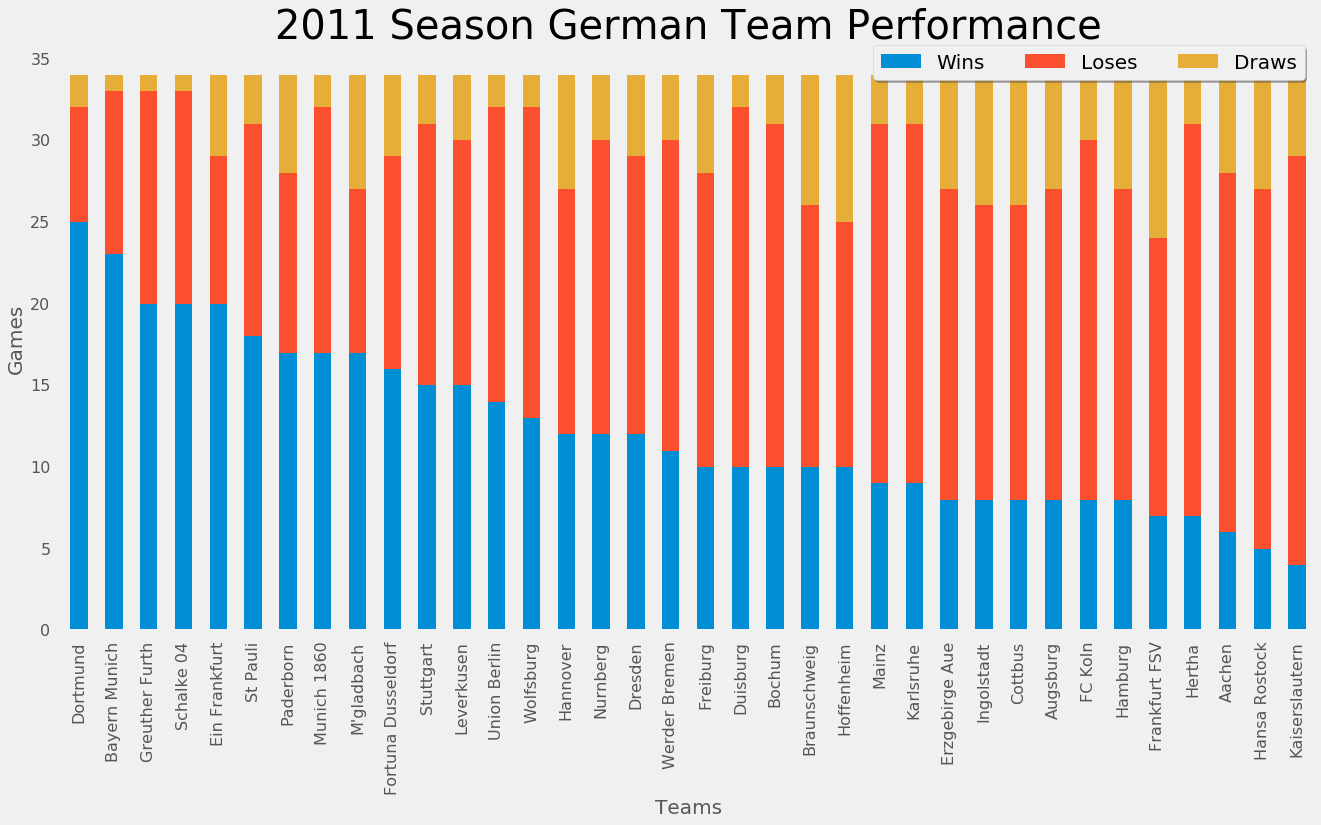

In [772]:
#here we are creating the key visualisation and saving it to a file for external use

ax = win_lose_count_df.plot.bar(stacked = "True", figsize = (20,10))
ax.set_xlabel("Teams", fontsize = 20)
ax.set_ylabel("Games", fontsize = 20)
ax.grid(False)
ax.set_title("2011 Season German Team Performance", fontsize = 40)
ax.legend(loc='upper right', ncol=3, fancybox=True, bbox_to_anchor=(1, 1.02), shadow=True, fontsize = 20)
plt.savefig('german_team_performance_team.png');

## Cursory Analysis

We can see from this visualisation that the top 3 performing teams by wins achieved are:

* Dortmund
* Bayern Munich
* Greuther Furth

This ties in with the success we have seen for Dortmund and Bayern Munich in terms of goals scored. Greuther Furth are intersting because in terms of goals scored, they were at position 5. This visualisation highlights the gap in performance between the highest performing (top 3) teams and the rest of the population.

##To do:

Due to time constraints, I've not been able to complete all tasks in the lab. I'll complete the remainder of these tasks over time. The remainder of tasks to be done are:

[ ] Retrieve data from the Darksky API

[ ] Cross reference data and analyse

[ ] Upload findings to a Mongo DB

[ ] Use OOP classes to implement the above functionality
